In [1]:
# !pip install opencv-python

In [2]:
# pip install opencv-python
# for cv2 ( computer Vision) 

In [3]:
import numpy as np
import pandas as pd
import cv2 # OpenCV
import matplotlib.pyplot as plt

In [4]:
# import os
# os.chdir(r"D:\Training\Imarticus\PGA\PGA27\CV")

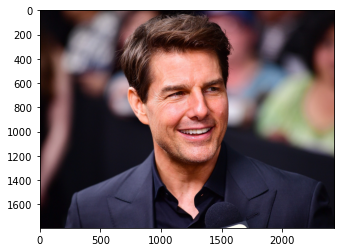

In [5]:
im1=plt.imread(r"D:\Training\Imarticus\PGA\PGA27\CV\tom-cruise-secret-life.webp")
plt.imshow(im1)
plt.show() 

In [6]:
im1.shape

(1793, 2428, 3)

In [7]:
im2=im1.copy()
im2[:,:,0]=0  # Red channel
im2[:,:,1]=0  # Green channel

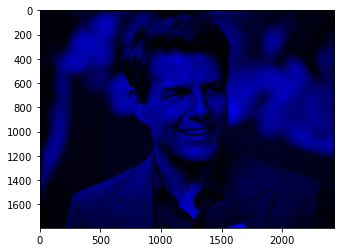

In [8]:
plt.imshow(im2) 

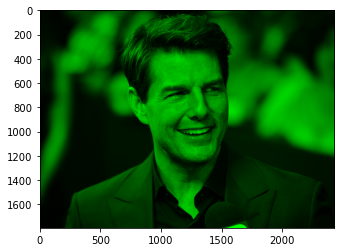

In [9]:
im2=im1.copy()
im2[:,:,0]=0  # red channel
im2[:,:,2]=0  # Blue channel
plt.imshow(im2)

## RGB or BGR?

There is a difference in pixel ordering in OpenCV and Matplotlib. 

OpenCV follows BGR order, while matplotlib likely follows RGB order.

Therefore, when we display an image loaded in OpenCV using matplotlib functions, we may want to convert it into RGB mode.

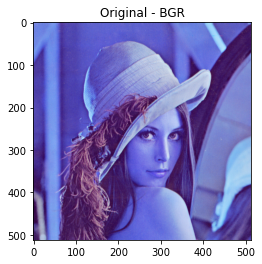

In [10]:
image = cv2.imread("Lena.tiff")# matplotlib expects in RGB
plt.imshow(image)
plt.title("Original - BGR")
plt.show() 

In [11]:
# image

In [12]:
image.shape

(512, 512, 3)

See how the above image looks like as Matplotlib is expecting the channel orders to be R,G, B.

Let's extract the individual reg, green and blue channels from the original image.

In [13]:
# plt.imshow(R)
# cv2.imshow("image", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [14]:
# Extracting and showing individual channels
(B, G, R) = cv2.split(image)

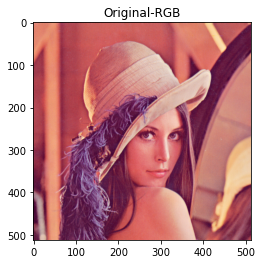

In [15]:
rgb_img = cv2.merge([R,G,B])
plt.imshow(rgb_img)
plt.title("Original-RGB")
plt.show() 

In [16]:
# img1 = cv2.imread('Lena.tiff', 0)
# cv2.imshow("Image", img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

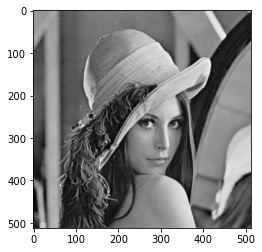

In [18]:
#  img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) ::  https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
img1 = cv2.imread('Lena.tiff')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.show()

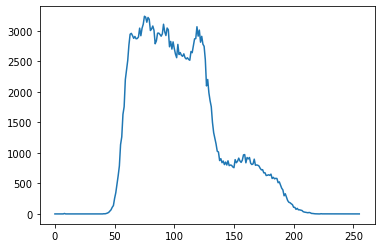

In [19]:
hist_values = cv2.calcHist([img1],channels=[0],mask=None,histSize=[256],ranges=[0,255])
plt.plot(hist_values)
plt.show()

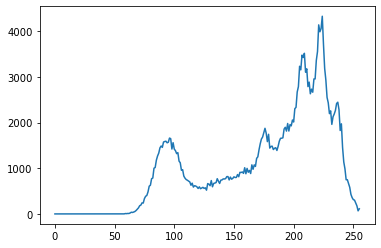

In [20]:
img1 = cv2.imread('Lena.tiff')
hist_values = cv2.calcHist([img1],channels=[2],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)
plt.show()

In [28]:
img1 = cv2.imread('Lena.tiff')
img2=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [24]:
# Histogram Equalization
eq_img = cv2.equalizeHist(img2) 

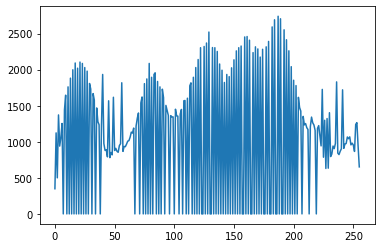

In [29]:
hist_values = cv2.calcHist([eq_img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)
plt.show()

In [30]:
eq_img

array([[202, 202, 202, ..., 212, 187, 127],
       [202, 202, 202, ..., 212, 187, 127],
       [202, 202, 202, ..., 212, 187, 127],
       ...,
       [  9,   9,  23, ...,  88,  81,  77],
       [ 11,  11,  32, ...,  88,  90,  94],
       [ 11,  11,  32, ...,  88,  90,  94]], dtype=uint8)

In [31]:
img2

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

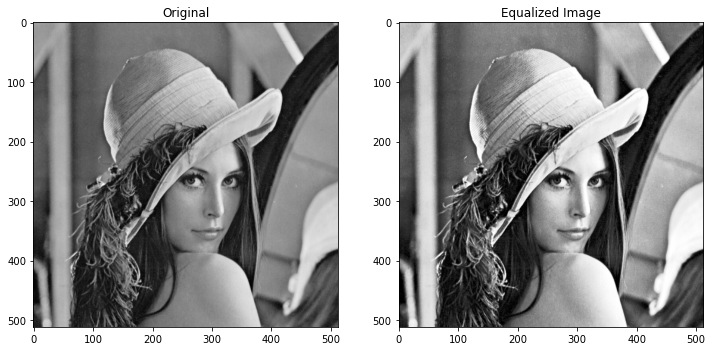

In [32]:
eq_img = cv2.equalizeHist(img2) 
plt.figure(figsize=(12,8))
# Display the output
plt.subplot(121)
plt.imshow(img2, cmap="gray")
plt.title('Original')

plt.subplot(122)
plt.imshow(eq_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

Text(0.5, 1.0, 'Histogram of Equalized Image')

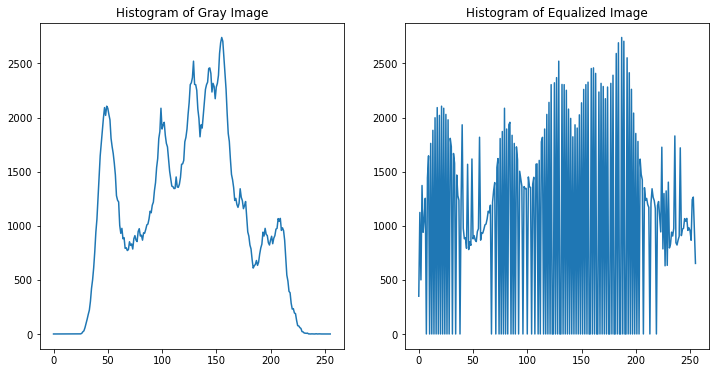

In [58]:
his_gray = cv2.calcHist([img],[0],None,[256],[0,256]) 
hist_eq = cv2.calcHist([eq_img],[0],None,[256],[0,256])  

plt.figure(figsize=(12,6))

# Display the output
plt.subplot(121)
plt.plot(his_gray)
plt.title('Histogram of Gray Image')

plt.subplot(122)
plt.plot(hist_eq)
plt.title('Histogram of Equalized Image')

### Spatial Filtering of Images

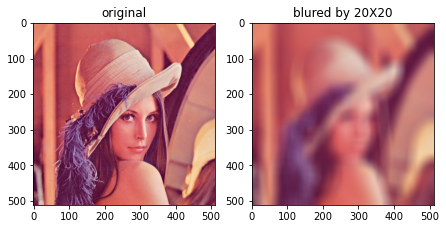

In [39]:
#1. Smoothing with Averaging Filter : Correlations / kernal'
plt.figure(figsize=(15,10))
img1 = cv2.imread('Lena.tiff')
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.subplot(141)
plt.imshow(img) 
plt.title("original")

plt.subplot(142)
# Blur with a 5x5 averaging filter
blur1 = cv2.blur(img,(35,35))
plt.imshow(blur1)
plt.title("blured by 20X20")

plt.show()

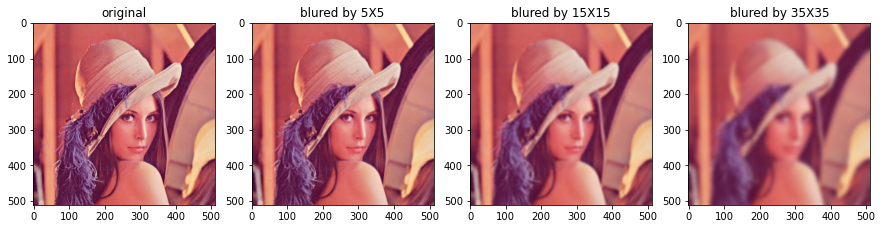

In [38]:
#2. Smoothing with a Gaussian Filter

plt.figure(figsize=(15,10))
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.subplot(141)
plt.imshow(img)
plt.title("original")

# Blur with a 5x5 averaging filter
plt.subplot(142)
blur1 = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur1)
plt.title("blured by 5X5")


# Blur with a 15x15 averaging filter
plt.subplot(143)
blur2 = cv2.GaussianBlur(img,(15,15),0)
plt.imshow(blur2)
plt.title("blured by 15X15")

# Blur with a 35x35 averaging filter
plt.subplot(144)
blur3 = cv2.GaussianBlur(img,(35,35),0)
plt.imshow(blur3)
plt.title("blured by 35X35")
plt.show()

In [33]:
# Median Filtering

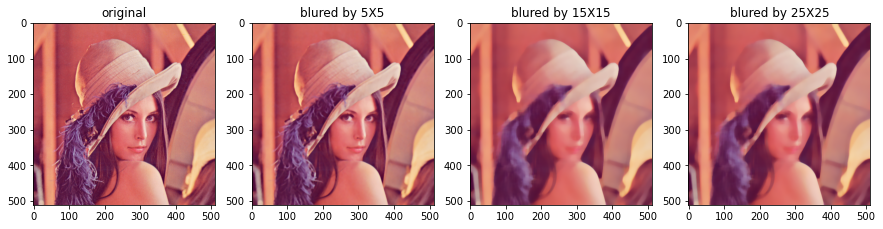

In [64]:
plt.figure(figsize=(15,10))
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.subplot(141)
plt.imshow(img)
plt.title("original")
# Apply a 5x5 median filter
plt.subplot(142)
med_img1 = cv2.medianBlur(img, ksize=5)
plt.imshow(med_img1)
plt.title("blured by 5X5")


# Apply a 15x15 median filter
plt.subplot(143)
med_img2 = cv2.medianBlur(img, ksize=15)
plt.imshow(med_img2)
plt.title("blured by 15X15")
# Apply a 25x25 median filter
plt.subplot(144)
med_img3 = cv2.medianBlur(img, ksize=25)
plt.imshow(med_img2)
plt.title("blured by 25X25")
plt.show()

## Color Histogram

In [35]:
#calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

In [36]:
?cv2.calcHist

In [75]:
img = cv2.imread("Lena.tiff")
ht=cv2.calcHist(img, [0], None,[256],[0,256] ) # BGR - B[0], G[1], R[2]

(array([256.,   0.,   0.,   0.,   0.]),
 array([  0,  50, 100, 150, 200, 255]),
 <BarContainer object of 5 artists>)

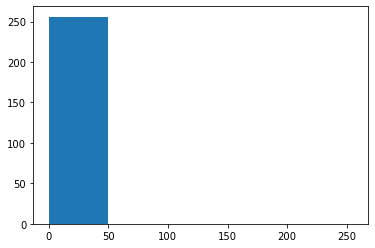

In [76]:
plt.hist(ht, bins=[0,50, 100, 150,200, 255])

(array([157.,  52.,  13.,  11.,   5.,   3.,   7.,   3.,   2.,   3.]),
 array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

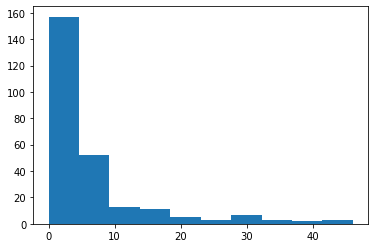

In [77]:
plt.hist(ht)

In [78]:
color = ('b','g','r')
for i , col in enumerate(color):
    print(i, "--", col)

0 -- b
1 -- g
2 -- r


In [40]:
# ?cv2.calcHist

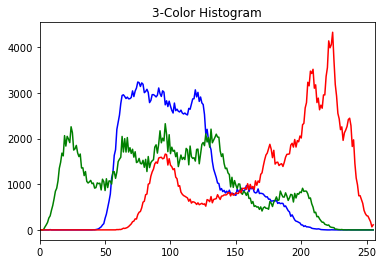

In [79]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('3-Color Histogram')
plt.show()

## Thresholding for Binarization

In [48]:
img1 = cv2.imread('Lena.tiff')
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
threshold, binary_img = cv2.threshold(img2,125, 255, cv2.THRESH_BINARY)

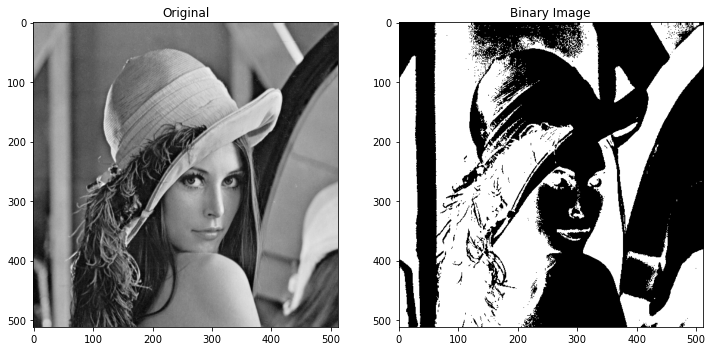

In [49]:
plt.figure(figsize=(12,8))
# Display the output
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(binary_img, cmap='binary')
plt.title('Binary Image')
plt.show()


In [101]:
# calculate frequency of pixels in range 0-255 
his_gray = cv2.calcHist([img],[0],None,[256],[0,256]) 
hist_bin = cv2.calcHist([binary_img],[0],None,[256],[0,256])  

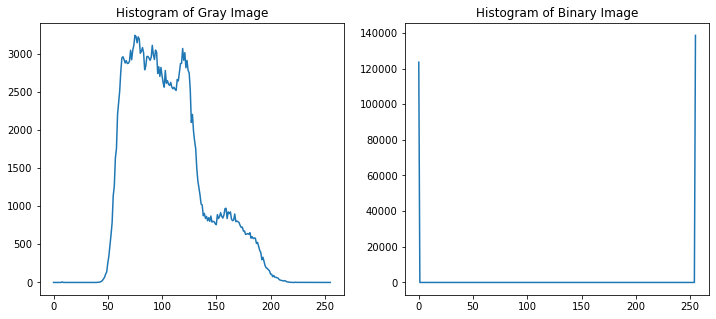

In [102]:
plt.figure(figsize=(12,5))

# Display the output
plt.subplot(121)
plt.plot(his_gray)
plt.title('Histogram of Gray Image')

plt.subplot(122)
plt.plot(hist_bin)
plt.title('Histogram of Binary Image')
plt.show()


### Drawing Line, Rectangle and Circle on top of an Image

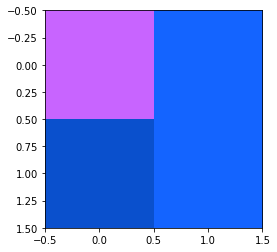

In [59]:
a1=np.array([[[200,100,255],
             [20,100,255]],
            [[10,80,205],
             [20,100,255]]])
plt.imshow(a1)

In [63]:
df=pd.read_excel(r"D:\Training\Imarticus\PGA\PGA27\DL\pga_27_dl.xlsx", sheet_name="Sheet5", header=None)

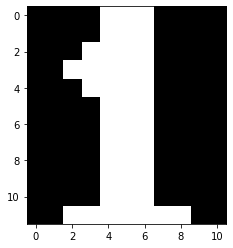

In [68]:
plt.imshow(df.values, cmap="gray")

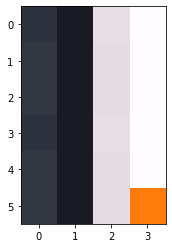

In [69]:

ar1=np.array([[[ 46,  50,  62],
        [ 26,  26,  36],
        [232, 222, 230],
        [255, 253, 255]],
             [[ 51,  55,  66],
        [ 26,  26,  36],
        [227, 220, 227],
        [255, 253, 255]],
             [[ 51,  55,  66],
        [ 26,  26,  36],
        [227, 220, 227],
        [255, 253, 255]],
             [[ 46,  50,  62],
        [ 26,  26,  36],
        [232, 222, 230],
        [255, 253, 255]],
             [[ 51,  55,  66],
        [ 26,  26,  36],
        [227, 220, 227],
        [255, 253, 255]],
             [[ 51,  55,  66],
        [ 26,  26,  36],
        [227, 220, 227],
        [255, 123, 12]]])
plt.imshow(ar1)

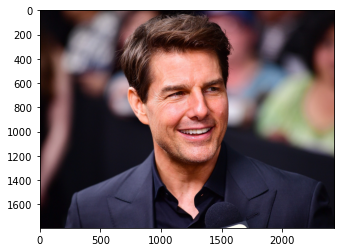

In [89]:
immm=plt.imread(r"D:\Training\Imarticus\PGA\PGA27\CV\tom-cruise-secret-life.webp")
plt.imshow(immm) 

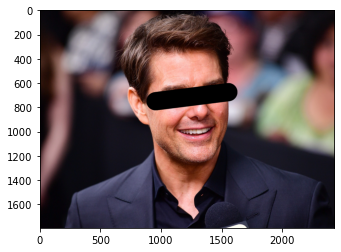

In [90]:
cv2.line(immm, (950,750), (1550,675), (0,0,0), 150)
plt.imshow(immm)

In [72]:
immm.shape

(18, 25, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


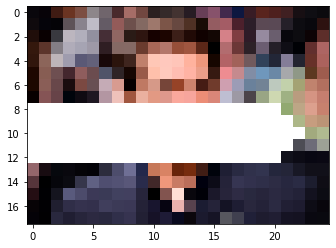

In [75]:
imm1=cv2.line(immm, (0,10), (17,10), (255,156,78), 1)
plt.imshow(imm1)

In [50]:
immm.shape

(13, 20, 3)

In [66]:
# np.zeros([3,4,2])

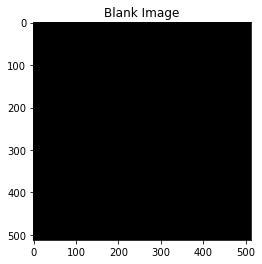

In [91]:
# Create a black image
image = np.zeros((512,512,3), np.uint8)
plt.imshow(image), 
plt.title("Blank Image")
plt.show()

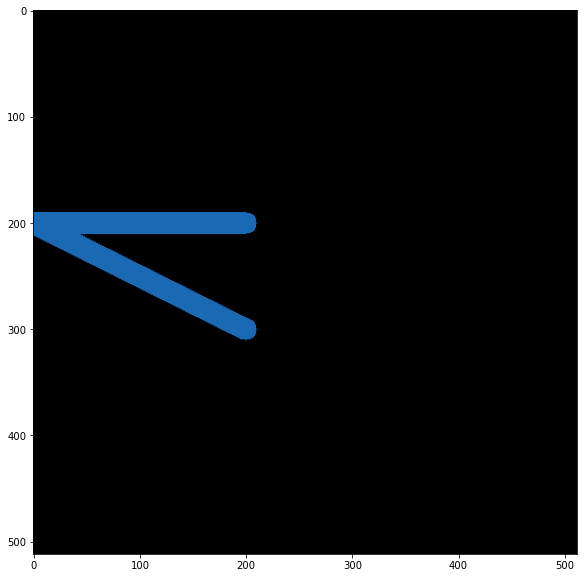

In [93]:
# cv2.line(image, starts, end, color code , width)
plt.figure(figsize=(12,10))
im2=cv2.line(image,(0,200), (200,200),(25, 105, 180), 20)
plt.imshow(im2)
plt.show()

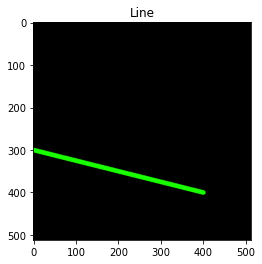

In [94]:
# Draw a diagonal blue line of thickness of 5 pixels
image = np.zeros((512,512,3), np.uint8) # black canvas
# cv2.line(image, (0,100), (512,100), (255,255,255), 100)
# cv2.line(image, start cord, end cord, color code, width, line_style)
cv2.line(image, (0,300), (400,400), (25,255,0), 10)

plt.imshow(image), 
plt.title("Line")
plt.show()

In [74]:
image = cv2.imread('Lena.tiff')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img1=img.copy()
img2=img.copy()
img3=img.copy()

True

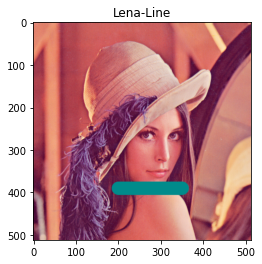

In [95]:
image = cv2.imread('Lena.tiff')

img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# drawing a line
cv2.line(img1,    # image
         (200,390),   # starting point
         (350, 390),   # end point
         (0,139,139),  # color
         thickness=30,  # thickness
         lineType=cv2.LINE_AA # line type
   )
plt.imshow(img1), 
plt.title("Lena-Line")
cv2.imwrite("Lena-Line.jpg", img1)

True

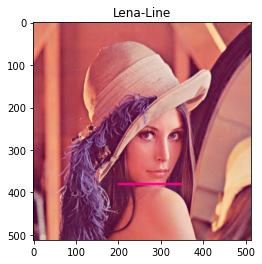

In [141]:
image = cv2.imread('Lena.tiff')

img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# drawing a line
cv2.line(img1,    # image
         (200,380),   # starting point
         (350, 380),   # end point
         (255,0,139),  # color
         thickness=3,  # thickness
         lineType=cv2.LINE_AA # line type
   )
plt.imshow(img1), 
plt.title("Lena-Line")
cv2.imwrite("Lena-Line.jpg", img1)

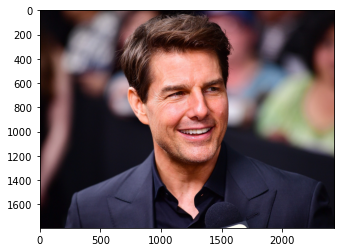

In [98]:
immm=plt.imread(r"D:\Training\Imarticus\PGA\PGA27\CV\tom-cruise-secret-life.webp")
plt.imshow(immm)



True

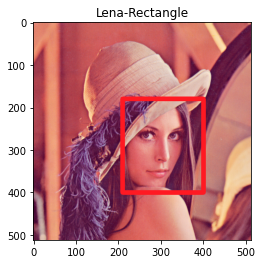

In [97]:
# Draw a rectangle (thickness is a positive integer)
image = cv2.imread('Lena.tiff')

img2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.rectangle(img2,          # source image
              (210, 180),          # upper left corner vertex
              (400, 400),         # lower right corner vertex
              (255, 25, 34),        # color
              thickness=10,        # line thickness
              lineType=cv2.LINE_8  # line type
)

plt.imshow(img2), 
plt.title("Lena-Rectangle")
cv2.imwrite("Lena-Rect.jpg", img2)

True

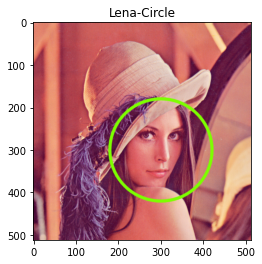

In [99]:
image = cv2.imread('Lena.tiff')

img3 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.circle(img3,             # source image
           (300, 300),       # center
           120,              # radius
           (125, 255, 0),      # color or border
           thickness=5,      # line thickness
           lineType=cv2.LINE_AA   # line type
)
plt.imshow(img3)
plt.title("Lena-Circle")
cv2.imwrite(r"D:\Training\Imarticus\PGA\PGA18\imageCircle.jpg", img3)

## Drawing Bounding Box

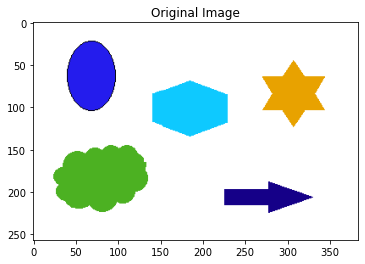

In [140]:
# Read an image
image = cv2.imread('Bounding.png')

#print(image.shape)

# Show the image
plt.imshow(image)
plt.title('Original Image')
plt.show()

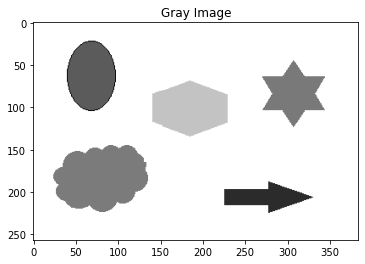

In [141]:

# Create binary image
gray = cv2.cvtColor(src = image, code = cv2.COLOR_BGR2GRAY)

# Show the gray image
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.show()

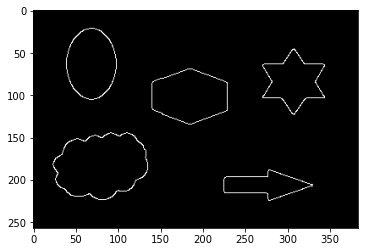

In [150]:
blur = cv2.GaussianBlur(src = gray, ksize = (3, 3), sigmaX = 0)
low_thresh = 5
high_thresh = 255
canny = cv2.Canny(blur, low_thresh, high_thresh)
plt.imshow(canny, cmap='gray')


In [151]:
(contours,hierarchy) = cv2.findContours(image = canny, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

In [159]:
!pip install abcXYZ

In [152]:
# contours 

In [153]:
# Create all-black mask image
mask = np.zeros(shape = image.shape, dtype = "uint8")

In [154]:
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(img = mask, pt1 = (x, y), pt2 = (x + w, y + h), color = (255, 255, 255), thickness = -1)

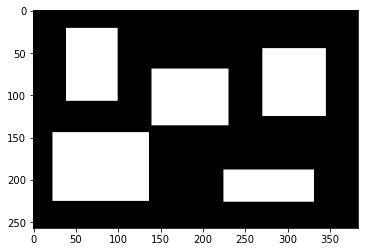

In [156]:
plt.imshow(mask)

In [157]:
img = cv2.bitwise_and(src1 = image, src2 = mask)

Text(0.5, 1.0, 'White Filled Bounding Boxes')

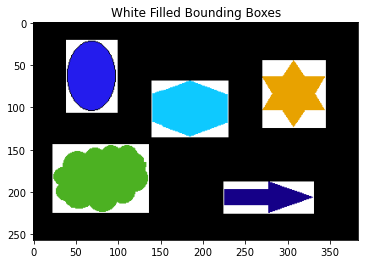

In [158]:
plt.imshow(img, cmap='gray')
plt.title('White Filled Bounding Boxes')

In [68]:
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)

for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])

In [69]:
import random as rng
rng.seed(12345)

In [70]:
# Create all-black mask image
mask = np.zeros(shape = image.shape, dtype = "uint8")

# Draw polygonal contour + bonding rects + circles
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(mask, contours_poly, i, color)
    cv2.rectangle(mask, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    cv2.circle(mask, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

Text(0.5, 1.0, 'Bounding Boxes')

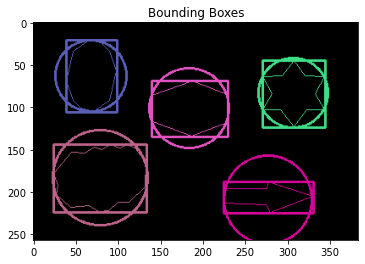

In [71]:
plt.imshow(mask, cmap='gray')
plt.title('Bounding Boxes')

In [72]:
# Draw polygonal contour + bonding rects + circles

for i in range(len(contours)):
    
    # Draw the object contour with Red color   
    cv2.drawContours(image, contours_poly, i, (255,0,0), 2)
    
    # Draw the bounding boxes with Green color
    cv2.rectangle(image, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), (0,255,0), 2) 

    # Draw the Bounding circles with Blue color
    cv2.circle(image, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), (0,0,255), 2)

Text(0.5, 1.0, 'Bounding Boxes and Bounding Circles')

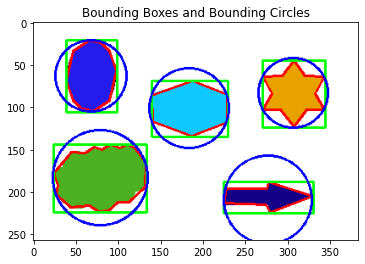

In [73]:
plt.imshow(image)
plt.title('Bounding Boxes and Bounding Circles')

### Image Translation

In [172]:
# ?cv2.warpAffine

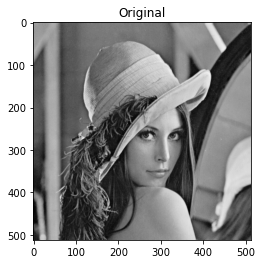

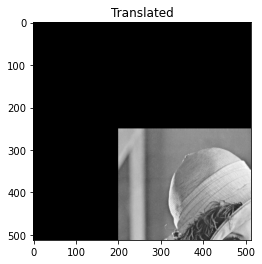

In [147]:
img = cv2.imread('Lena.tiff', 0)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.show()

rows, cols = img.shape

M = np.float32([[1, 0, 200],[0, 1, 250]])  # [x, y, move]

dst = cv2.warpAffine(img, M, (cols,rows))

plt.imshow(dst, cmap='gray')
plt.title('Translated')
plt.show()

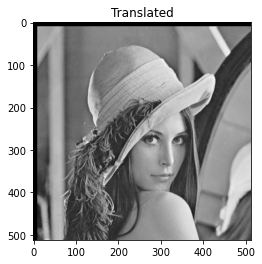

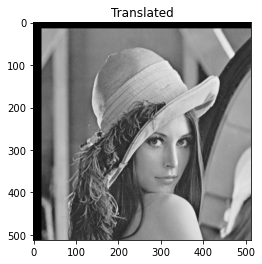

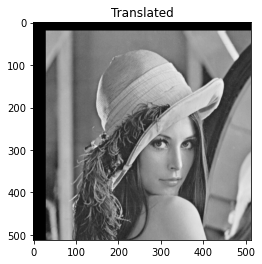

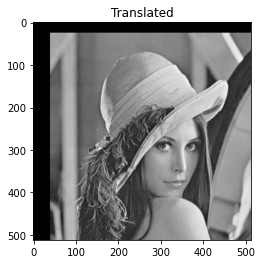

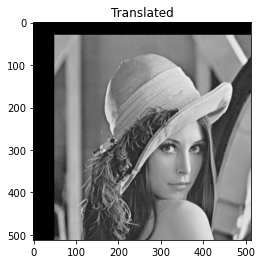

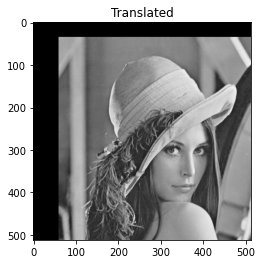

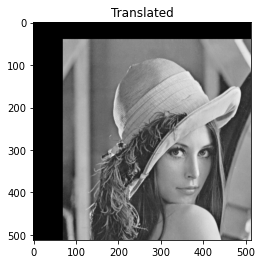

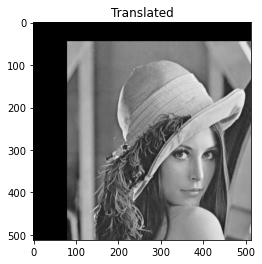

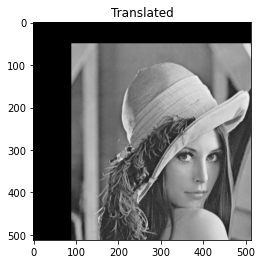

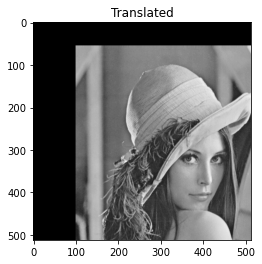

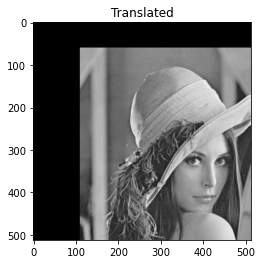

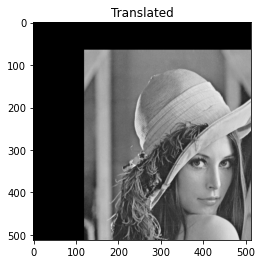

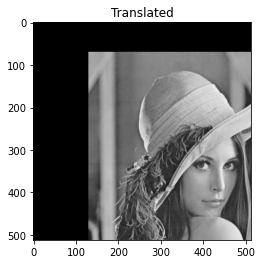

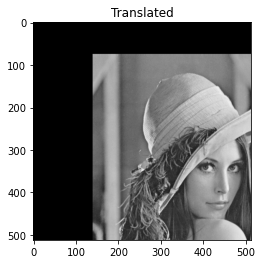

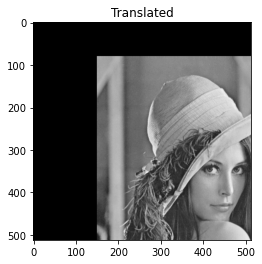

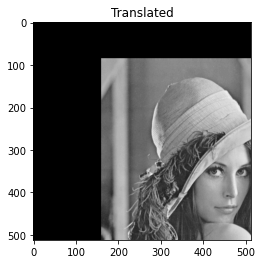

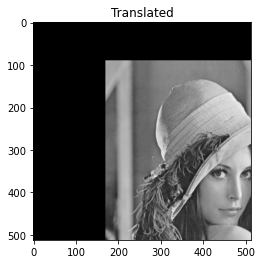

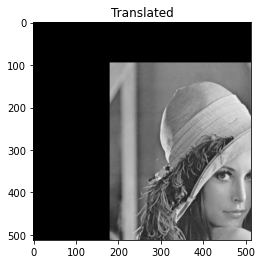

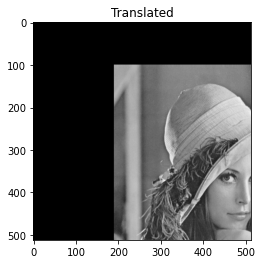

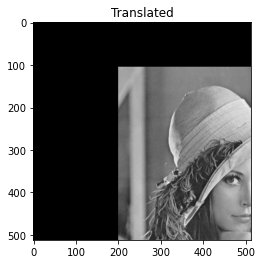

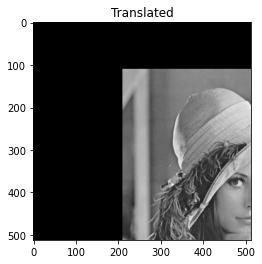

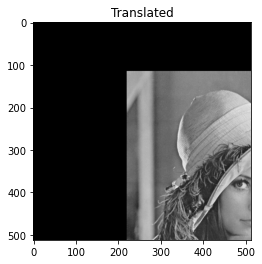

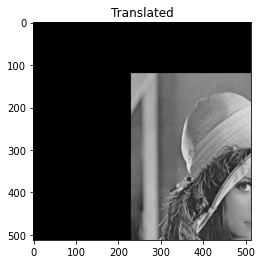

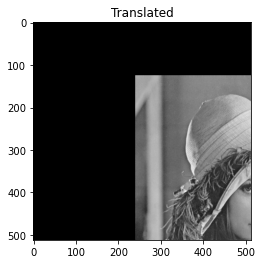

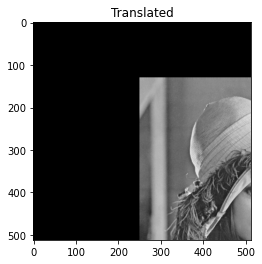

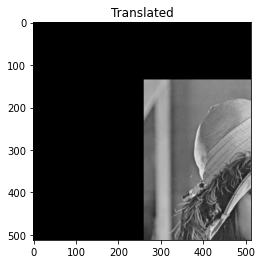

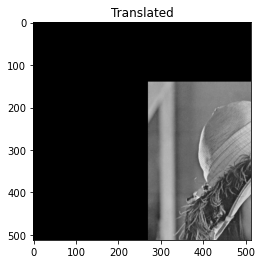

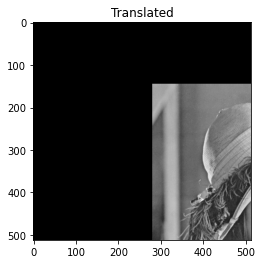

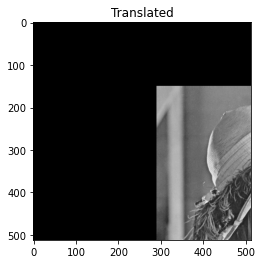

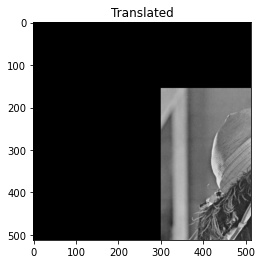

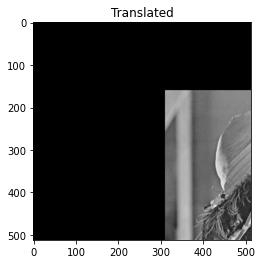

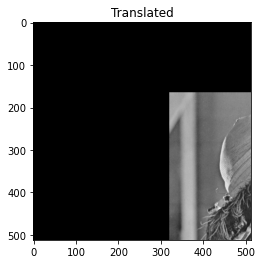

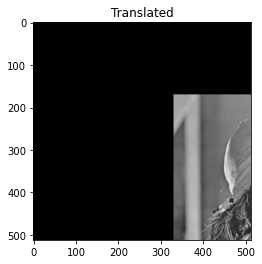

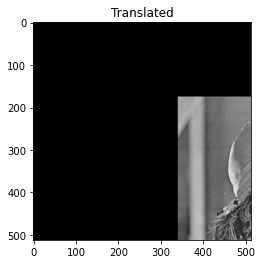

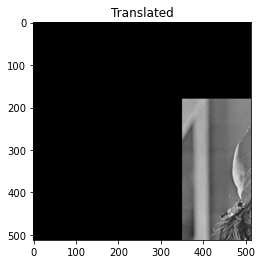

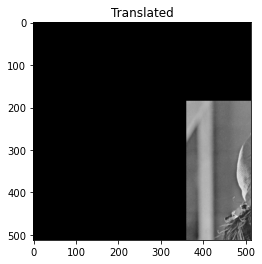

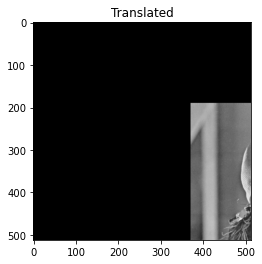

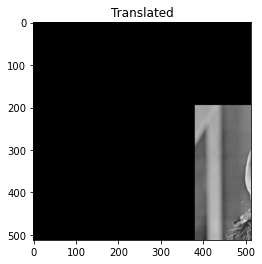

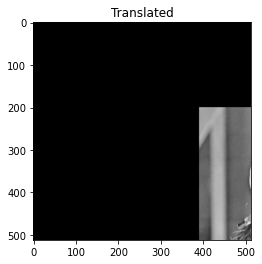

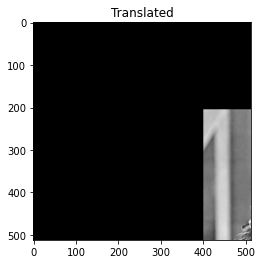

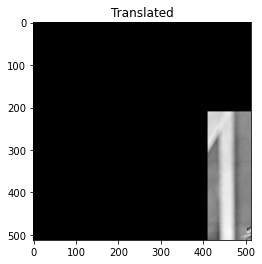

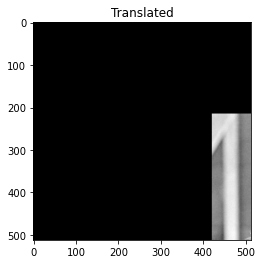

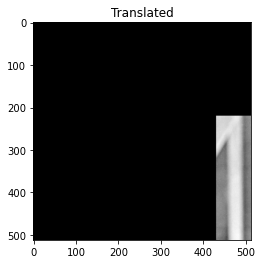

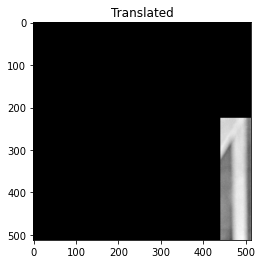

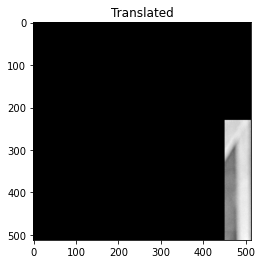

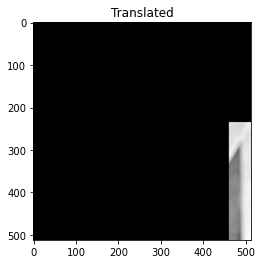

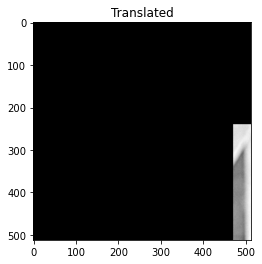

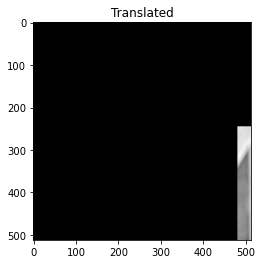

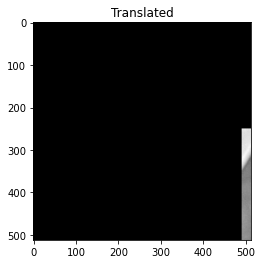

In [180]:
for i,j in zip(range(10,500,10), range(10,510,5)):
    rows, cols = img.shape
    M = np.float32([[1, 0, i],[0, 1, j]])  # [x, y, move]
    dst = cv2.warpAffine(img, M, (cols,rows))
    plt.imshow(dst, cmap='gray')
    plt.title('Translated')
    plt.show()

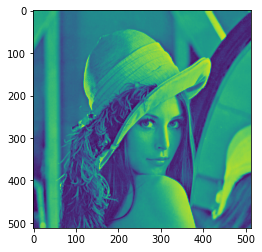

In [82]:
img = cv2.imread('Lena.tiff', 0)
plt.imshow(img)

In [61]:
img = cv2.imread('Lena.tiff', 0)
img.shape

(512, 512)

In [78]:
?cv2.resize

In [83]:
img = cv2.imread('Lena.tiff', 0)
row, col = img.shape
# print('\n Original Image dimensions : {} x {}'.format(row, col))
res = cv2.resize(img, None, fx=.3, fy=.3, interpolation = cv2.INTER_CUBIC)
row, col = res.shape
# print('\n Resized Image dimensions : {} x {}'.format(row, col))

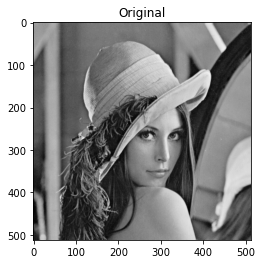

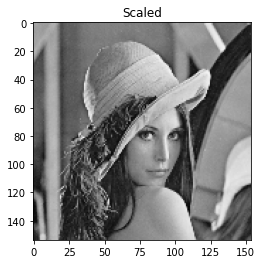

In [84]:
img = cv2.imread('Lena.tiff', 0)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.show() 

plt.imshow(res, cmap='gray')
plt.title('Scaled')
plt.show()

In [168]:
img = cv2.imread('Lena.tiff', 0)

row, col = img.shape
print('\n Original Image dimensions : {} x {}'.format(row, col))

res1 = cv2.resize(img, None, fx=.6, fy=.6, interpolation = cv2.INTER_CUBIC)
row, col = res1.shape
print('\n Resized Image dimensions : {} x {}'.format(row, col))


 Original Image dimensions : 512 x 512

 Resized Image dimensions : 307 x 307


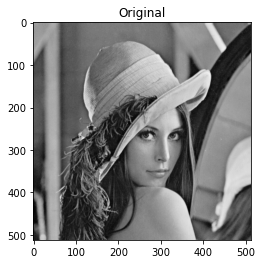

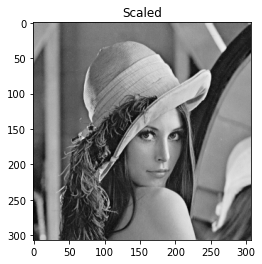

In [169]:
img = cv2.imread('Lena.tiff', 0)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.show() 

plt.imshow(res1, cmap='gray')
plt.title('Scaled')
plt.show()

In [170]:
# res1.save("D:\Training\Imarticus\PGA\PGA20\DL_NLP\CV\changed_image.jpg")

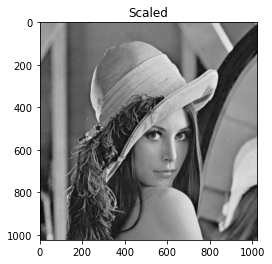

In [171]:
height, width = img.shape[:2]

res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.imshow(res, cmap='gray')
plt.title('Scaled')
plt.show()


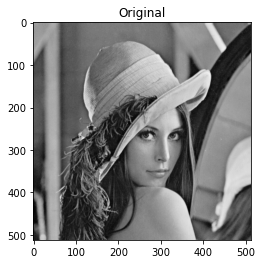

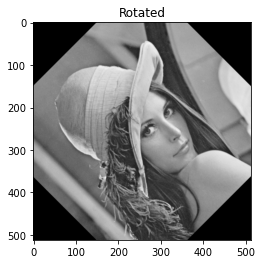

In [87]:
rows,cols = img.shape

plt.imshow(img, cmap='gray')
plt.title('Original')
plt.show()

M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)


dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst, cmap='gray')
plt.title('Rotated')
plt.show()

### EDGE DETECTION

In [109]:
?cv2.Sobel

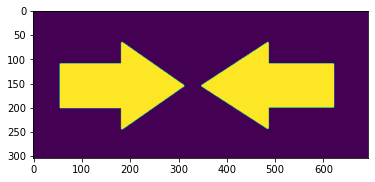

In [88]:
img = cv2.imread('blackandwhite.jpg',0)
plt.imshow(img)

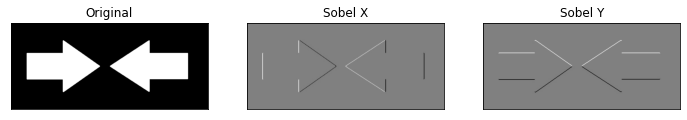

In [89]:
img = cv2.imread('blackandwhite.jpg',0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)  # X axis - Vertical Edge detection 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)  # Y axis - Horizantal Edge Detection

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
plt.show()

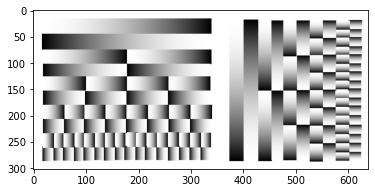

In [90]:
img = cv2.imread('gradient.jpg')
plt.imshow(img)

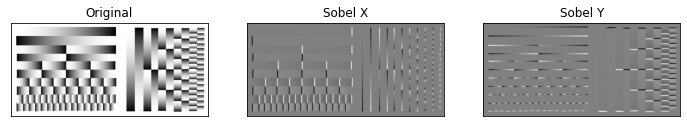

In [91]:
img = cv2.imread('gradient.jpg',0)


sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
plt.show()

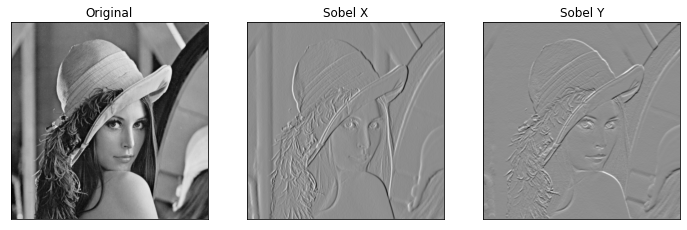

In [92]:
img = cv2.imread('Lena.tiff',0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])


plt.subplot(1,3,2)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
plt.show()

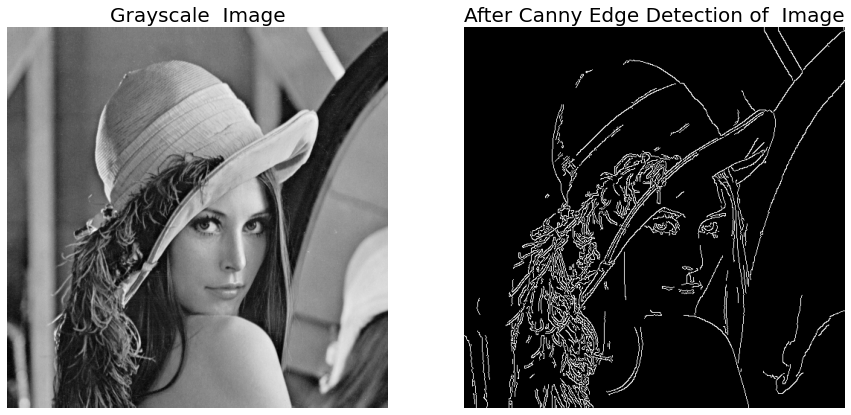

In [93]:
height = 224
width = 224
font_size = 20
edges = cv2.Canny(img, threshold1 = 100, threshold2 = 200)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Grayscale  Image', fontsize = font_size); 
plt.axis('off')
plt.imshow(img, cmap = 'gray')

plt.subplot(1, 2, 2).set_title(f'After Canny Edge Detection of  Image', fontsize = font_size); 
plt.axis('off')
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()

## Video

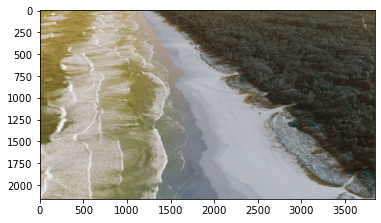

In [134]:
plt.imshow(frame)

In [146]:
# help(cv2.VideoWriter_fourcc)

In [75]:
# !pip install opencv-python

In [182]:
cap = cv2.VideoCapture(0)
if (cap.isOpened() == False):
    print("Unable to read camera feed")
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
out = cv2.VideoWriter('outpy1.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
while(True):
    ret, frame = cap.read()
    if ret == True:
        out.write(frame)
#         cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [95]:
import cv2
cap = cv2.VideoCapture('outpy.avi')
count = 0
while cap.isOpened():
    ret,frame = cap.read()
    cv2.imshow('window-name', frame)
    cv2.imwrite("frame%d.jpg" % count, frame)
    count = count + 1
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows() # destroy all opened windows

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-nvves523\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [108]:
# cap = cv2.VideoCapture(r"https://www.youtube.com/watch?v=xSzsD4kXhRw&ab_channel=ProgrammingKnowledge")
# while True:
#     ret, frame = cap.read()

#     if not ret:
#         cap = cv2.VideoCapture(r"https://www.youtube.com/watch?v=xSzsD4kXhRw&ab_channel=ProgrammingKnowledge")
#         continue

In [25]:
doc = cv2.imread('game.jpg')
doc = cv2.cvtColor(doc, cv2.COLOR_BGR2RGB)
# The Template to Match
temp = cv2.imread('game_temp.jpg')
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)

In [26]:
match = cv2.matchTemplate(doc, temp, eval('cv2.TM_CCOEFF'))

# Grab the Max and Min values, plus their locations
_, _, _, maxLoc = cv2.minMaxLoc(match)
top_left_corner = maxLoc
bottom_right_corner = (top_left_corner[0] + width, top_left_corner[1] + height)
# Draw the Red Rectangle
cv2.rectangle(doc,top_left_corner, bottom_right_corner, 255, 10)
plt.figure(figsize = (20,20))
plt.imshow(doc)
plt.title('Detected Point')
plt.show()

NameError: name 'width' is not defined

### Masking an Image

In [3]:
image = cv2.imread('Lena.tiff')
cv2.imshow("Original", image)

mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
cv2.imshow("Rectangular Mask", mask)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Mask Applied to Image", masked)
cv2.waitKey(0)

-1

SystemExit: 2

usage: ipykernel_launcher.py [-h] [-i IMAGE]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Archit\AppData\Roaming\jupyter\runtime\kernel-beed30b2-5ff9-4147-b588-bed350fefb89.json


SystemExit: 2

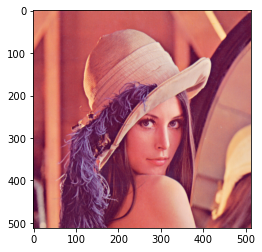

In [46]:
image = cv2.imread('Lena.tiff')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
image.shape[:2]

(512, 512)

In [15]:
?cv2.rectangle

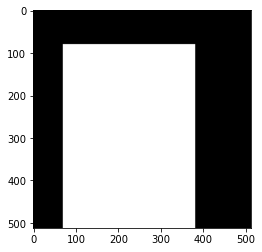

In [61]:
mask = np.zeros(img.shape[:2], dtype="uint8")
mm=cv2.rectangle(mask, (70, 512), (380, 80), 255, -1)
mm = cv2.cvtColor(mm, cv2.COLOR_BGR2RGB)
plt.imshow(mm)

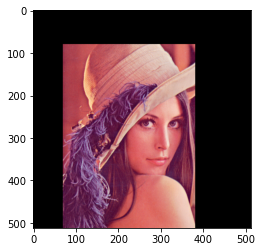

In [63]:
masked = cv2.bitwise_and(image, image, mask=mask)
masked = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)
plt.imshow(masked)

In [4]:
# mask = np.zeros(image.shape[:2], dtype="uint8")
# cv2.circle(mask, (145, 200), 100, 255, -1)
# masked = cv2.bitwise_and(image, image, mask=mask)
# # show the output images
# cv2.imshow("Circular Mask", mask)
# cv2.imshow("Mask Applied to Image", masked)
# cv2.waitKey(0)

In [6]:

import glob
from PIL import Image


images=glob.glob(r"C:\Users\Archit\Desktop\CV_AA\CV1\project\Dataset\Dataset\masks.jpg")

for image in images:
    img = Image.open(image)
    img1 = img.resize(50,50)
    img1.save(image)

In [ ]:
from multiprocessing import Pool
import os

path1 = "C:\Users\Archit\Desktop\CV_AA\CV1\project\Dataset\Dataset"
# path2 = "some/other/path"

listing = os.listdir(path1)    

p = Pool(5) # process 5 images simultaneously



In [14]:
#import the library opencv
import cv2
#globbing utility.
import glob
#select the path
path = "C:/Users/Archit/Desktop/CV_AA\CV1/project/Dataset/Dataset/*.*"
for file in glob.glob(path):
    print(file)
    a= cv2.imread(file)
    print(a)
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    cv2.imshow('Color image', c)
    #wait for 1 second
    k = cv2.waitKey(1000)
    #destroy the window
    cv2.destroyAllWindows()